In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
data = pd.read_csv("Heart_Disease_Prediction.csv")
data["Heart Disease"] = data["Heart Disease"].map({"Absence":0, "Presence": 1})
data = data.rename(columns={'EKG results': 'ECG results'})
data = data[data['ECG results'] != 1]
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,ECG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [11]:
X = data.drop(columns=["Heart Disease"])
y = data["Heart Disease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
y_pred = rf_model.predict(X_test)

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

#y_pred = rf_model.predict_proba(X_test)[:, 1]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86        48
           1       0.83      0.73      0.77        33

    accuracy                           0.83        81
   macro avg       0.83      0.81      0.82        81
weighted avg       0.83      0.83      0.83        81

Accuracy: 0.83
Recall: 0.73
Precision: 0.83
F1 Score: 0.77


In [16]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
import numpy as np

# Define scoring functions
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score)
}

# Perform cross-validation
cv_results = {metric: cross_val_score(rf_model, X_test, y_test, cv=5, scoring=scorer)
              for metric, scorer in scoring.items()}

# Calculate mean and standard deviation for each metric
for metric, scores in cv_results.items():
    print(f"{metric.capitalize()}: Mean = {scores.mean():.2f}, SD = {scores.std():.2f}")


Accuracy: Mean = 0.79, SD = 0.09
Recall: Mean = 0.70, SD = 0.08
Precision: Mean = 0.79, SD = 0.12
F1: Mean = 0.67, SD = 0.16


[1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1
 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0]


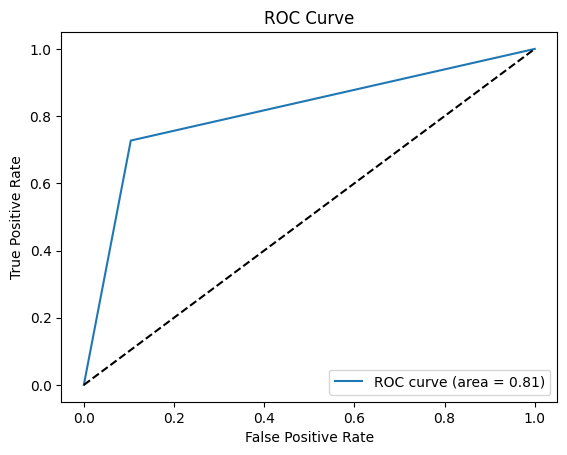

ROC-AUC Score: 0.81


In [14]:
print(y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f'ROC-AUC Score: {roc_auc:.2f}')

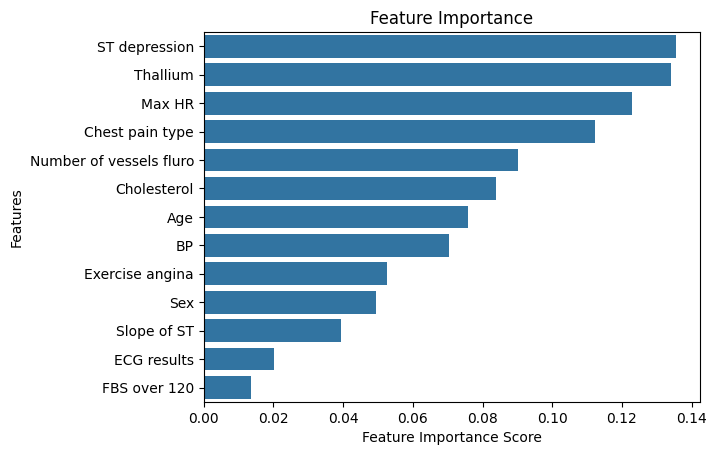

In [15]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plotting Feature Importance
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()